Inconsistent User IDs:
    user_activity_df email_activity_df file_activity_df http_activity_df  \
0            HSB0196              None          HSB0196          LRR0148   
1            HSB0196              None             None          NGF0157   
2               None              None             None          NGF0157   
3               None              None             None          LRR0148   
4               None              None             None          NGF0157   
..               ...               ...              ...              ...   
122             None              None             None             None   
123             None              None             None             None   
124             None              None             None             None   
125             None              None             None             None   
126             None              None             None             None   

    psychometric_df  
0           TCD0009  
1           YCE0983 

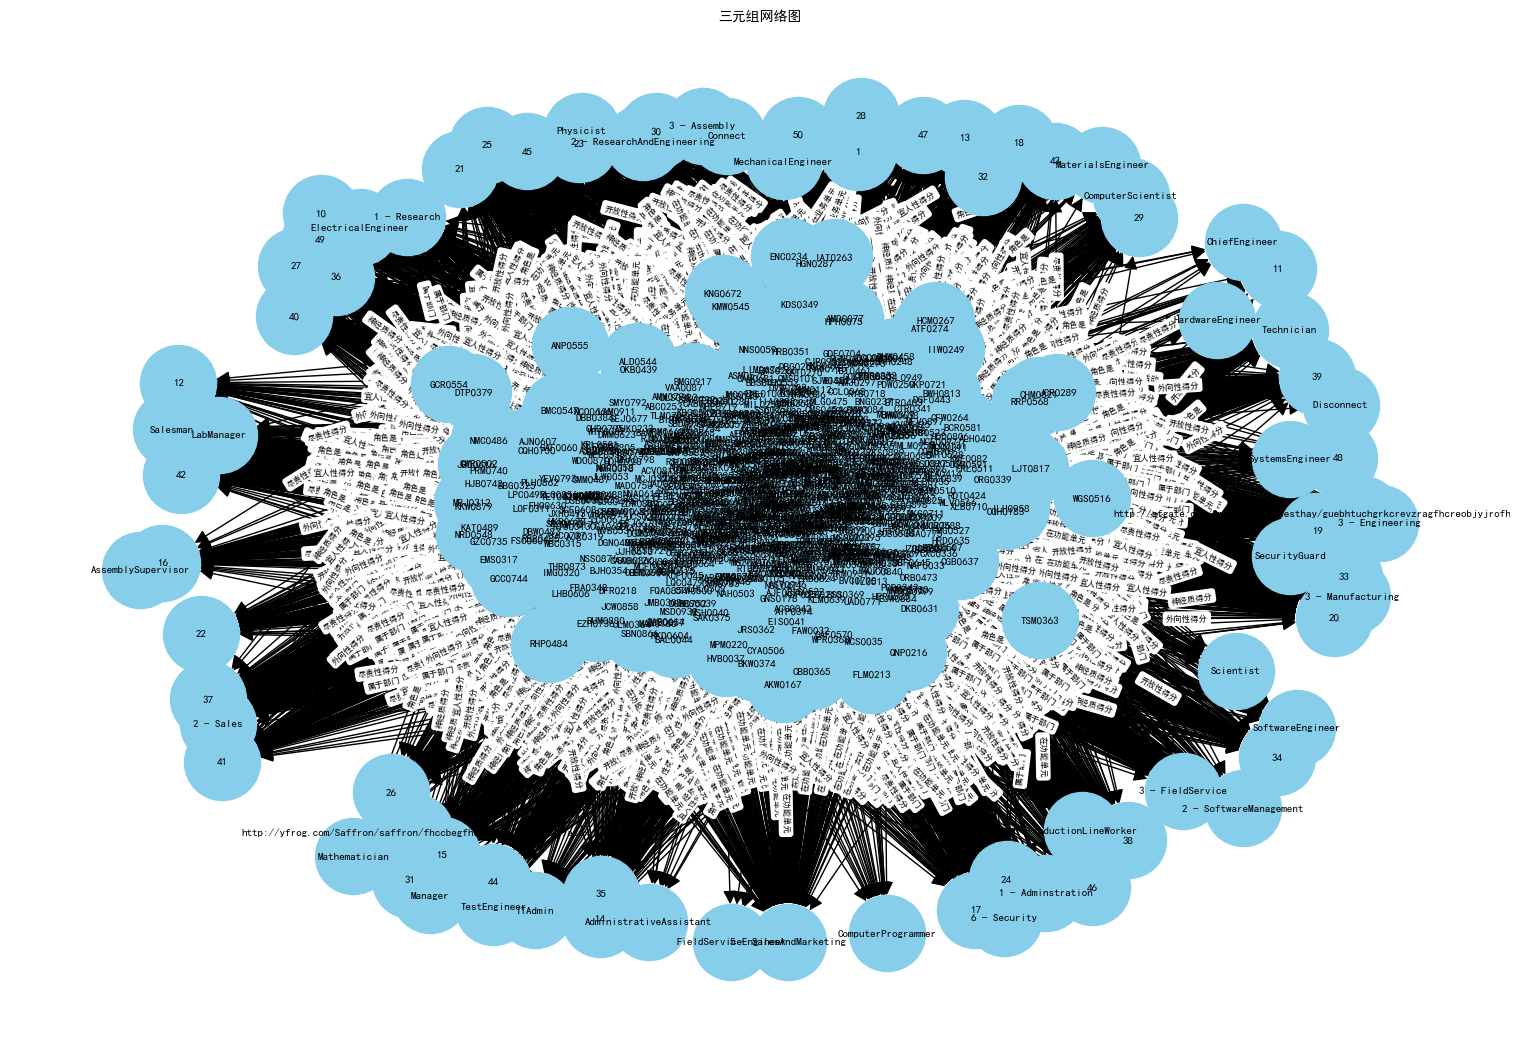

In [1]:
import pandas as pd

# Load the datasets from the provided paths
user_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\device.csv')
email_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\email.csv')
file_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\file.csv')
http_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\http.csv')
department_info_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\DepartmentInfo.csv')
psychometric_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\psychometric.csv')


# Function to check and clean data
def clean_data():
    # Check for missing values and drop or fill them
    user_activity_df.dropna(inplace=True)
    email_activity_df.dropna(inplace=True)
    file_activity_df.dropna(inplace=True)
    http_activity_df.dropna(inplace=True)
    department_info_df.dropna(inplace=True)
    psychometric_df.dropna(inplace=True)

    # Convert date columns to datetime format
    user_activity_df['date'] = pd.to_datetime(user_activity_df['date'])
    email_activity_df['date'] = pd.to_datetime(email_activity_df['date'])
    file_activity_df['date'] = pd.to_datetime(file_activity_df['date'])
    http_activity_df['date'] = pd.to_datetime(http_activity_df['date'])

    # Standardize the column names if necessary
    user_activity_df.columns = map(str.lower, user_activity_df.columns)
    email_activity_df.columns = map(str.lower, email_activity_df.columns)
    file_activity_df.columns = map(str.lower, file_activity_df.columns)
    http_activity_df.columns = map(str.lower, http_activity_df.columns)
    department_info_df.columns = map(str.lower, department_info_df.columns)
    psychometric_df.columns = map(str.lower, psychometric_df.columns)

    return (
    user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)


# Clean the data
user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df = clean_data()


# Function to find inconsistent user_ids
def find_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df,
                               department_info_df, psychometric_df):
    # Check the integrity of user_id across datasets
    user_ids = set(department_info_df['user_id'])

    inconsistent_user_ids = {
        'user_activity_df': [uid for uid in user_activity_df['user'] if uid not in user_ids],
        'email_activity_df': [uid for uid in email_activity_df['user'] if uid not in user_ids],
        'file_activity_df': [uid for uid in file_activity_df['user'] if uid not in user_ids],
        'http_activity_df': [uid for uid in http_activity_df['user'] if uid not in user_ids],
        'psychometric_df': [uid for uid in psychometric_df['user_id'] if uid not in user_ids],
    }

    return inconsistent_user_ids


# Find inconsistent user_ids
inconsistent_user_ids = find_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df,
                                                   http_activity_df, department_info_df, psychometric_df)

# Display the inconsistent user_ids
inconsistent_user_ids_df = pd.DataFrame.from_dict(inconsistent_user_ids, orient='index').transpose()
print("Inconsistent User IDs:")
print(inconsistent_user_ids_df)


# Function to remove inconsistent user_ids
def remove_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df,
                                 department_info_df, psychometric_df):
    user_ids = set(department_info_df['user_id'])

    user_activity_df = user_activity_df[user_activity_df['user'].isin(user_ids)]
    email_activity_df = email_activity_df[email_activity_df['user'].isin(user_ids)]
    file_activity_df = file_activity_df[file_activity_df['user'].isin(user_ids)]
    http_activity_df = http_activity_df[http_activity_df['user'].isin(user_ids)]
    psychometric_df = psychometric_df[psychometric_df['user_id'].isin(user_ids)]

    return (
    user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)


# Remove inconsistent user_ids
user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df = remove_inconsistent_user_ids(
    user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)


# Define function to extract triples
def extract_triples(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df,
                    psychometric_df):
    triples = []

    # From user_activity_df
    for _, row in user_activity_df.iterrows():
        triples.append((row['user'], '进行活动', row['activity']))
        triples.append((row['activity'], '发生在', row['date']))
        triples.append((row['user'], '使用设备', row['pc']))

    # From email_activity_df
    for _, row in email_activity_df.iterrows():
        triples.append((row['user'], '发送邮件到', row['to']))
        triples.append((row['user'], '使用设备', row['pc']))
        triples.append((row['id'], '邮件大小', row['size']))
        triples.append((row['id'], '附件数量', row['attachments']))
        triples.append((row['id'], '邮件内容', row['content']))

    # From file_activity_df
    for _, row in file_activity_df.iterrows():
        triples.append((row['user'], '访问文件', row['filename']))
        triples.append((row['filename'], '文件内容', row['content']))

    # From http_activity_df
    for _, row in http_activity_df.iterrows():
        triples.append((row['user'], '访问网址', row['url']))
        triples.append((row['url'], '网址内容', row['content']))

    # From department_info_df
    for _, row in department_info_df.iterrows():
        triples.append((row['user_id'], '属于部门', row['department']))
        triples.append((row['user_id'], '角色是', row['role']))
        triples.append((row['user_id'], '在业务单元', row['business_unit']))
        triples.append((row['user_id'], '在功能单元', row['functional_unit']))

    # From psychometric_df
    for _, row in psychometric_df.iterrows():
        triples.append((row['user_id'], '开放性得分', row['o']))
        triples.append((row['user_id'], '尽责性得分', row['c']))
        triples.append((row['user_id'], '外向性得分', row['e']))
        triples.append((row['user_id'], '宜人性得分', row['a']))
        triples.append((row['user_id'], '神经质得分', row['n']))

    return triples


# Extract triples
triples = extract_triples(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df,
                          psychometric_df)

# Create a directed graph
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set Chinese font
font_path = 'C:/Windows/Fonts/simhei.ttf'  # Windows系统下SimHei字体路径
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for triple in triples:
    G.add_edge(triple[0], triple[2], label=triple[1])

# Simplify the graph by removing less connected nodes
degree_threshold = 2
remove = [node for node, degree in dict(G.degree()).items() if degree <= degree_threshold]
G.remove_nodes_from(remove)

# Draw the network graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.1)  # Adjust k for better spacing
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=8, font_weight="bold", arrowsize=20,
        font_family=font_prop.get_name())
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6, font_family=font_prop.get_name())

plt.title("三元组网络图", fontproperties=font_prop)
plt.show()


Inconsistent User IDs:
    user_activity_df email_activity_df file_activity_df http_activity_df  \
0            HSB0196              None          HSB0196          LRR0148   
1            HSB0196              None             None          NGF0157   
2               None              None             None          NGF0157   
3               None              None             None          LRR0148   
4               None              None             None          NGF0157   
..               ...               ...              ...              ...   
122             None              None             None             None   
123             None              None             None             None   
124             None              None             None             None   
125             None              None             None             None   
126             None              None             None             None   

    psychometric_df  
0           TCD0009  
1           YCE0983 

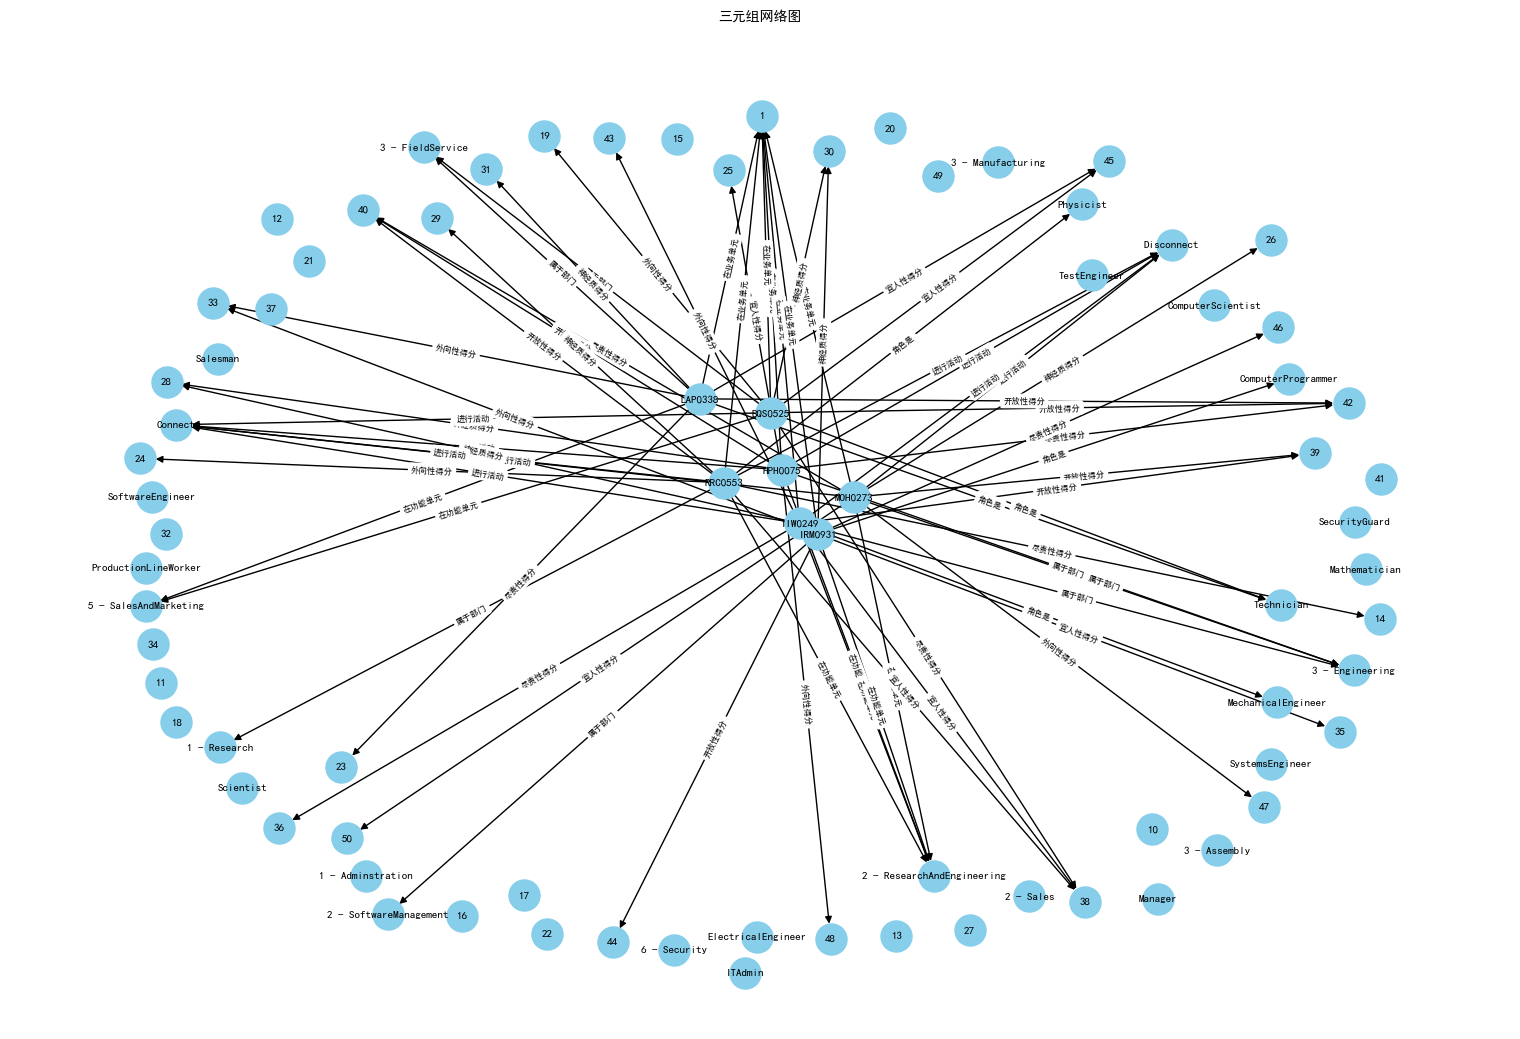

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 在 Jupyter Notebook 中显示 matplotlib 图形
%matplotlib inline

# Load the datasets from the provided paths
user_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\device.csv')
email_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\email.csv')
file_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\file.csv')
http_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\http.csv')
department_info_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\DepartmentInfo.csv')
psychometric_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\psychometric.csv')

# Function to check and clean data
def clean_data():
    # Check for missing values and drop or fill them
    user_activity_df.dropna(inplace=True)
    email_activity_df.dropna(inplace=True)
    file_activity_df.dropna(inplace=True)
    http_activity_df.dropna(inplace=True)
    department_info_df.dropna(inplace=True)
    psychometric_df.dropna(inplace=True)
    
    # Convert date columns to datetime format
    user_activity_df['date'] = pd.to_datetime(user_activity_df['date'])
    email_activity_df['date'] = pd.to_datetime(email_activity_df['date'])
    file_activity_df['date'] = pd.to_datetime(file_activity_df['date'])
    http_activity_df['date'] = pd.to_datetime(http_activity_df['date'])
    
    # Standardize the column names if necessary
    user_activity_df.columns = map(str.lower, user_activity_df.columns)
    email_activity_df.columns = map(str.lower, email_activity_df.columns)
    file_activity_df.columns = map(str.lower, file_activity_df.columns)
    http_activity_df.columns = map(str.lower, http_activity_df.columns)
    department_info_df.columns = map(str.lower, department_info_df.columns)
    psychometric_df.columns = map(str.lower, psychometric_df.columns)

    return (user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Clean the data
user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df = clean_data()

# Function to find inconsistent user_ids
def find_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    # Check the integrity of user_id across datasets
    user_ids = set(department_info_df['user_id'])
    
    inconsistent_user_ids = {
        'user_activity_df': [uid for uid in user_activity_df['user'] if uid not in user_ids],
        'email_activity_df': [uid for uid in email_activity_df['user'] if uid not in user_ids],
        'file_activity_df': [uid for uid in file_activity_df['user'] if uid not in user_ids],
        'http_activity_df': [uid for uid in http_activity_df['user'] if uid not in user_ids],
        'psychometric_df': [uid for uid in psychometric_df['user_id'] if uid not in user_ids],
    }
    
    return inconsistent_user_ids

# Find inconsistent user_ids
inconsistent_user_ids = find_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Display the inconsistent user_ids
inconsistent_user_ids_df = pd.DataFrame.from_dict(inconsistent_user_ids, orient='index').transpose()
print("Inconsistent User IDs:")
print(inconsistent_user_ids_df)

# Function to remove inconsistent user_ids
def remove_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    user_ids = set(department_info_df['user_id'])
    
    user_activity_df = user_activity_df[user_activity_df['user'].isin(user_ids)]
    email_activity_df = email_activity_df[email_activity_df['user'].isin(user_ids)]
    file_activity_df = file_activity_df[file_activity_df['user'].isin(user_ids)]
    http_activity_df = http_activity_df[http_activity_df['user'].isin(user_ids)]
    psychometric_df = psychometric_df[psychometric_df['user_id'].isin(user_ids)]
    
    return (user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Remove inconsistent user_ids
user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df = remove_inconsistent_user_ids(
    user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Define function to extract triples
def extract_triples(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    triples = []

    # From user_activity_df
    for _, row in user_activity_df.iterrows():
        triples.append((row['user'], '进行活动', row['activity']))
        triples.append((row['activity'], '发生在', row['date']))
        triples.append((row['user'], '使用设备', row['pc']))

    # From email_activity_df
    for _, row in email_activity_df.iterrows():
        triples.append((row['user'], '发送邮件到', row['to']))
        triples.append((row['user'], '使用设备', row['pc']))
        triples.append((row['id'], '邮件大小', row['size']))
        triples.append((row['id'], '附件数量', row['attachments']))
        triples.append((row['id'], '邮件内容', row['content']))

    # From file_activity_df
    for _, row in file_activity_df.iterrows():
        triples.append((row['user'], '访问文件', row['filename']))
        triples.append((row['filename'], '文件内容', row['content']))

    # From http_activity_df
    for _, row in http_activity_df.iterrows():
        triples.append((row['user'], '访问网址', row['url']))
        triples.append((row['url'], '网址内容', row['content']))

    # From department_info_df
    for _, row in department_info_df.iterrows():
        triples.append((row['user_id'], '属于部门', row['department']))
        triples.append((row['user_id'], '角色是', row['role']))
        triples.append((row['user_id'], '在业务单元', row['business_unit']))
        triples.append((row['user_id'], '在功能单元', row['functional_unit']))

    # From psychometric_df
    for _, row in psychometric_df.iterrows():
        triples.append((row['user_id'], '开放性得分', row['o']))
        triples.append((row['user_id'], '尽责性得分', row['c']))
        triples.append((row['user_id'], '外向性得分', row['e']))
        triples.append((row['user_id'], '宜人性得分', row['a']))
        triples.append((row['user_id'], '神经质得分', row['n']))

    return triples

# Extract triples
triples = extract_triples(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Set Chinese font
font_path = 'C:/Windows/Fonts/simhei.ttf'  # Windows系统下SimHei字体路径
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for triple in triples:
    G.add_edge(triple[0], triple[2], label=triple[1])

# Simplify the graph by removing less connected nodes
degree_threshold = 10  # Adjusted threshold
remove = [node for node, degree in dict(G.degree()).items() if degree <= degree_threshold]
G.remove_nodes_from(remove)

# Draw the network graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.3)  # Adjusted k for better spacing
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=8, font_weight="bold", arrowsize=10,
        font_family=font_prop.get_name())
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6, font_family=font_prop.get_name())

plt.title("三元组网络图", fontproperties=font_prop)
plt.show()


Inconsistent User IDs:
    user_activity_df email_activity_df file_activity_df http_activity_df  \
0            HSB0196              None          HSB0196          LRR0148   
1            HSB0196              None             None          NGF0157   
2               None              None             None          NGF0157   
3               None              None             None          LRR0148   
4               None              None             None          NGF0157   
..               ...               ...              ...              ...   
122             None              None             None             None   
123             None              None             None             None   
124             None              None             None             None   
125             None              None             None             None   
126             None              None             None             None   

    psychometric_df  
0           TCD0009  
1           YCE0983 

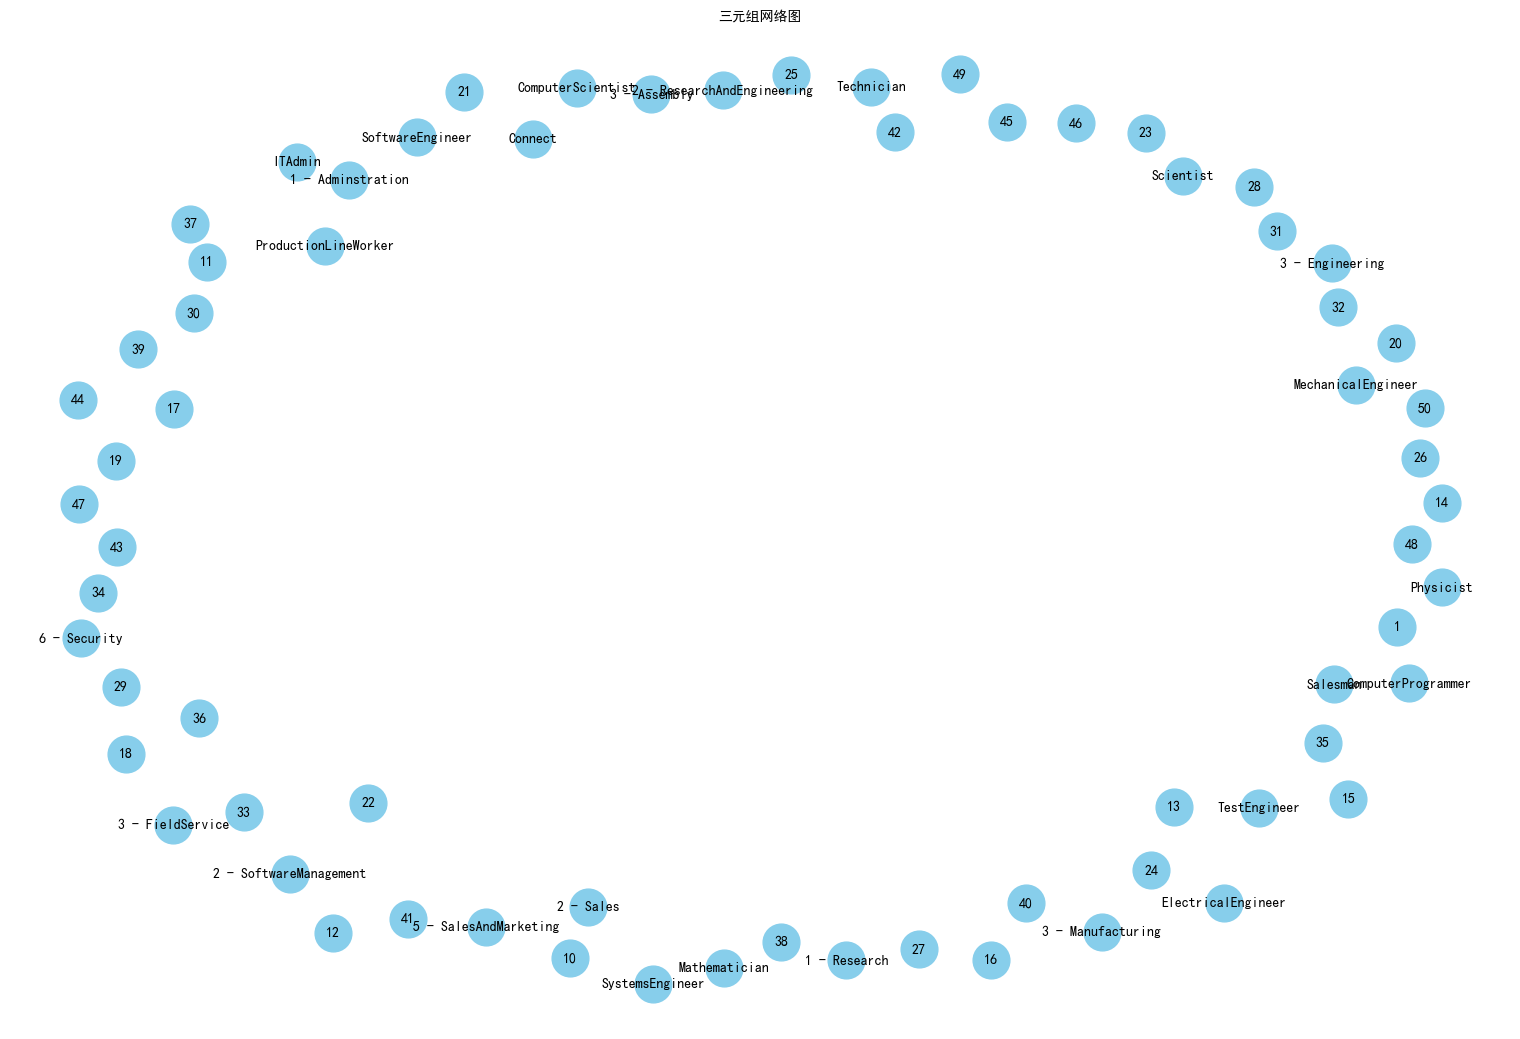

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 在 Jupyter Notebook 中显示 matplotlib 图形
%matplotlib inline

# Load the datasets from the provided paths
user_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\device.csv')
email_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\email.csv')
file_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\file.csv')
http_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\http.csv')
department_info_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\DepartmentInfo.csv')
psychometric_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\psychometric.csv')

# Function to check and clean data
def clean_data():
    # Check for missing values and drop or fill them
    user_activity_df.dropna(inplace=True)
    email_activity_df.dropna(inplace=True)
    file_activity_df.dropna(inplace=True)
    http_activity_df.dropna(inplace=True)
    department_info_df.dropna(inplace=True)
    psychometric_df.dropna(inplace=True)
    
    # Convert date columns to datetime format
    user_activity_df['date'] = pd.to_datetime(user_activity_df['date'])
    email_activity_df['date'] = pd.to_datetime(email_activity_df['date'])
    file_activity_df['date'] = pd.to_datetime(file_activity_df['date'])
    http_activity_df['date'] = pd.to_datetime(http_activity_df['date'])
    
    # Standardize the column names if necessary
    user_activity_df.columns = map(str.lower, user_activity_df.columns)
    email_activity_df.columns = map(str.lower, email_activity_df.columns)
    file_activity_df.columns = map(str.lower, file_activity_df.columns)
    http_activity_df.columns = map(str.lower, http_activity_df.columns)
    department_info_df.columns = map(str.lower, department_info_df.columns)
    psychometric_df.columns = map(str.lower, psychometric_df.columns)

    return (user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Clean the data
user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df = clean_data()

# Function to find inconsistent user_ids
def find_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    # Check the integrity of user_id across datasets
    user_ids = set(department_info_df['user_id'])
    
    inconsistent_user_ids = {
        'user_activity_df': [uid for uid in user_activity_df['user'] if uid not in user_ids],
        'email_activity_df': [uid for uid in email_activity_df['user'] if uid not in user_ids],
        'file_activity_df': [uid for uid in file_activity_df['user'] if uid not in user_ids],
        'http_activity_df': [uid for uid in http_activity_df['user'] if uid not in user_ids],
        'psychometric_df': [uid for uid in psychometric_df['user_id'] if uid not in user_ids],
    }
    
    return inconsistent_user_ids

# Find inconsistent user_ids
inconsistent_user_ids = find_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Display the inconsistent user_ids
inconsistent_user_ids_df = pd.DataFrame.from_dict(inconsistent_user_ids, orient='index').transpose()
print("Inconsistent User IDs:")
print(inconsistent_user_ids_df)

# Function to remove inconsistent user_ids
def remove_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    user_ids = set(department_info_df['user_id'])
    
    user_activity_df = user_activity_df[user_activity_df['user'].isin(user_ids)]
    email_activity_df = email_activity_df[email_activity_df['user'].isin(user_ids)]
    file_activity_df = file_activity_df[file_activity_df['user'].isin(user_ids)]
    http_activity_df = http_activity_df[http_activity_df['user'].isin(user_ids)]
    psychometric_df = psychometric_df[psychometric_df['user_id'].isin(user_ids)]
    
    return (user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Remove inconsistent user_ids
user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df = remove_inconsistent_user_ids(
    user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Define function to extract triples
def extract_triples(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    triples = []

    # From user_activity_df
    for _, row in user_activity_df.iterrows():
        triples.append((row['user'], '进行活动', row['activity']))
        triples.append((row['activity'], '发生在', row['date']))
        triples.append((row['user'], '使用设备', row['pc']))

    # From email_activity_df
    for _, row in email_activity_df.iterrows():
        triples.append((row['user'], '发送邮件到', row['to']))
        triples.append((row['user'], '使用设备', row['pc']))
        triples.append((row['id'], '邮件大小', row['size']))
        triples.append((row['id'], '附件数量', row['attachments']))
        triples.append((row['id'], '邮件内容', row['content']))

    # From file_activity_df
    for _, row in file_activity_df.iterrows():
        triples.append((row['user'], '访问文件', row['filename']))
        triples.append((row['filename'], '文件内容', row['content']))

    # From http_activity_df
    for _, row in http_activity_df.iterrows():
        triples.append((row['user'], '访问网址', row['url']))
        triples.append((row['url'], '网址内容', row['content']))

    # From department_info_df
    for _, row in department_info_df.iterrows():
        triples.append((row['user_id'], '属于部门', row['department']))
        triples.append((row['user_id'], '角色是', row['role']))
        triples.append((row['user_id'], '在业务单元', row['business_unit']))
        triples.append((row['user_id'], '在功能单元', row['functional_unit']))

    # From psychometric_df
    for _, row in psychometric_df.iterrows():
        triples.append((row['user_id'], '开放性得分', row['o']))
        triples.append((row['user_id'], '尽责性得分', row['c']))
        triples.append((row['user_id'], '外向性得分', row['e']))
        triples.append((row['user_id'], '宜人性得分', row['a']))
        triples.append((row['user_id'], '神经质得分', row['n']))

    return triples

# Extract triples
triples = extract_triples(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Set Chinese font
font_path = 'C:/Windows/Fonts/simhei.ttf'  # Windows系统下SimHei字体路径
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for triple in triples:
    G.add_edge(triple[0], triple[2], label=triple[1])

# Filter the graph to show specific activity types or roles
filtered_nodes = {n for n in G if G.degree(n) > 15}  # Show nodes with degree > 15
filtered_G = G.subgraph(filtered_nodes)

# Draw the network graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(filtered_G, k=0.3)  # Adjust k for better spacing
nx.draw(filtered_G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=15,
        font_family=font_prop.get_name())
edge_labels = nx.get_edge_attributes(filtered_G, 'label')
nx.draw_networkx_edge_labels(filtered_G, pos, edge_labels=edge_labels, font_size=8, font_family=font_prop.get_name())

plt.title("三元组网络图", fontproperties=font_prop)
plt.show()


Inconsistent User IDs:
    user_activity_df email_activity_df file_activity_df http_activity_df  \
0            HSB0196              None          HSB0196          LRR0148   
1            HSB0196              None             None          NGF0157   
2               None              None             None          NGF0157   
3               None              None             None          LRR0148   
4               None              None             None          NGF0157   
..               ...               ...              ...              ...   
122             None              None             None             None   
123             None              None             None             None   
124             None              None             None             None   
125             None              None             None             None   
126             None              None             None             None   

    psychometric_df  
0           TCD0009  
1           YCE0983 

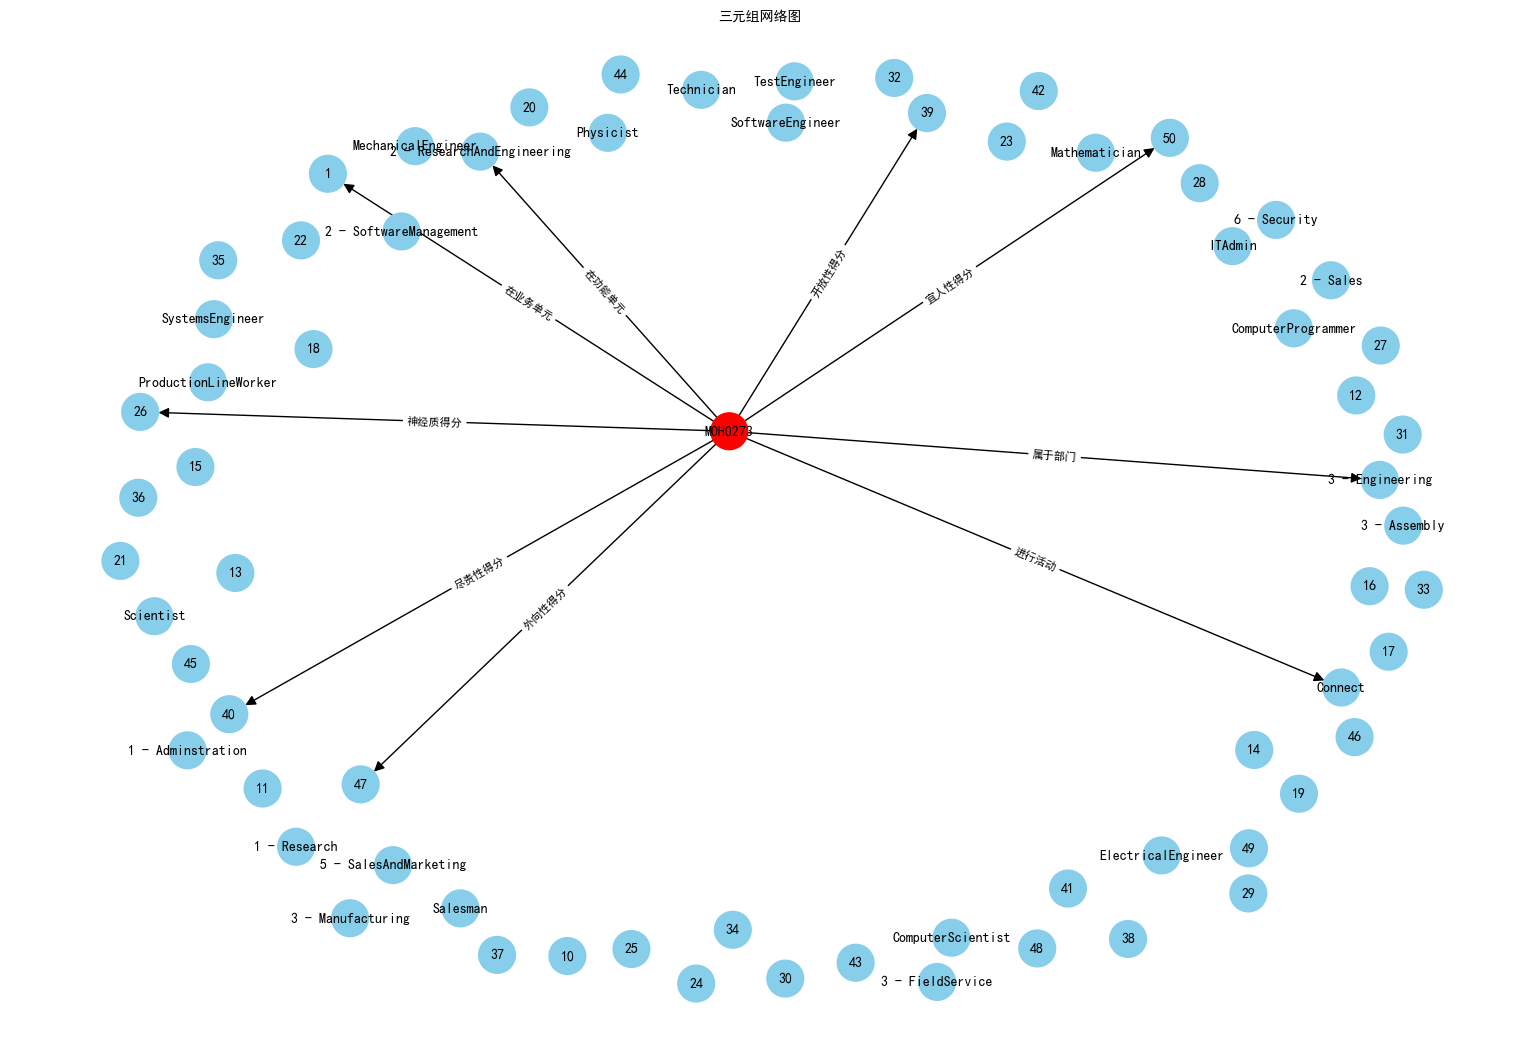

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 在 Jupyter Notebook 中显示 matplotlib 图形
%matplotlib inline

# Load the datasets from the provided paths
user_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\device.csv')
email_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\email.csv')
file_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\file.csv')
http_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\http.csv')
department_info_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\DepartmentInfo.csv')
psychometric_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\psychometric.csv')

# Function to check and clean data
def clean_data():
    # Check for missing values and drop or fill them
    user_activity_df.dropna(inplace=True)
    email_activity_df.dropna(inplace=True)
    file_activity_df.dropna(inplace=True)
    http_activity_df.dropna(inplace=True)
    department_info_df.dropna(inplace=True)
    psychometric_df.dropna(inplace=True)
    
    # Convert date columns to datetime format
    user_activity_df['date'] = pd.to_datetime(user_activity_df['date'])
    email_activity_df['date'] = pd.to_datetime(email_activity_df['date'])
    file_activity_df['date'] = pd.to_datetime(file_activity_df['date'])
    http_activity_df['date'] = pd.to_datetime(http_activity_df['date'])
    
    # Standardize the column names if necessary
    user_activity_df.columns = map(str.lower, user_activity_df.columns)
    email_activity_df.columns = map(str.lower, email_activity_df.columns)
    file_activity_df.columns = map(str.lower, file_activity_df.columns)
    http_activity_df.columns = map(str.lower, http_activity_df.columns)
    department_info_df.columns = map(str.lower, department_info_df.columns)
    psychometric_df.columns = map(str.lower, psychometric_df.columns)

    return (user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Clean the data
user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df = clean_data()

# Function to find inconsistent user_ids
def find_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    # Check the integrity of user_id across datasets
    user_ids = set(department_info_df['user_id'])
    
    inconsistent_user_ids = {
        'user_activity_df': [uid for uid in user_activity_df['user'] if uid not in user_ids],
        'email_activity_df': [uid for uid in email_activity_df['user'] if uid not in user_ids],
        'file_activity_df': [uid for uid in file_activity_df['user'] if uid not in user_ids],
        'http_activity_df': [uid for uid in http_activity_df['user'] if uid not in user_ids],
        'psychometric_df': [uid for uid in psychometric_df['user_id'] if uid not in user_ids],
    }
    
    return inconsistent_user_ids

# Find inconsistent user_ids
inconsistent_user_ids = find_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Display the inconsistent user_ids
inconsistent_user_ids_df = pd.DataFrame.from_dict(inconsistent_user_ids, orient='index').transpose()
print("Inconsistent User IDs:")
print(inconsistent_user_ids_df)

# Function to remove inconsistent user_ids
def remove_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    user_ids = set(department_info_df['user_id'])
    
    user_activity_df = user_activity_df[user_activity_df['user'].isin(user_ids)]
    email_activity_df = email_activity_df[email_activity_df['user'].isin(user_ids)]
    file_activity_df = file_activity_df[file_activity_df['user'].isin(user_ids)]
    http_activity_df = http_activity_df[http_activity_df['user'].isin(user_ids)]
    psychometric_df = psychometric_df[psychometric_df['user_id'].isin(user_ids)]
    
    return (user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Remove inconsistent user_ids
user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df = remove_inconsistent_user_ids(
    user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Define function to extract triples
def extract_triples(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    triples = []

    # From user_activity_df
    for _, row in user_activity_df.iterrows():
        triples.append((row['user'], '进行活动', row['activity']))
        triples.append((row['activity'], '发生在', row['date']))
        triples.append((row['user'], '使用设备', row['pc']))

    # From email_activity_df
    for _, row in email_activity_df.iterrows():
        triples.append((row['user'], '发送邮件到', row['to']))
        triples.append((row['user'], '使用设备', row['pc']))
        triples.append((row['id'], '邮件大小', row['size']))
        triples.append((row['id'], '附件数量', row['attachments']))
        triples.append((row['id'], '邮件内容', row['content']))

    # From file_activity_df
    for _, row in file_activity_df.iterrows():
        triples.append((row['user'], '访问文件', row['filename']))
        triples.append((row['filename'], '文件内容', row['content']))

    # From http_activity_df
    for _, row in http_activity_df.iterrows():
        triples.append((row['user'], '访问网址', row['url']))
        triples.append((row['url'], '网址内容', row['content']))

    # From department_info_df
    for _, row in department_info_df.iterrows():
        triples.append((row['user_id'], '属于部门', row['department']))
        triples.append((row['user_id'], '角色是', row['role']))
        triples.append((row['user_id'], '在业务单元', row['business_unit']))
        triples.append((row['user_id'], '在功能单元', row['functional_unit']))

    # From psychometric_df
    for _, row in psychometric_df.iterrows():
        triples.append((row['user_id'], '开放性得分', row['o']))
        triples.append((row['user_id'], '尽责性得分', row['c']))
        triples.append((row['user_id'], '外向性得分', row['e']))
        triples.append((row['user_id'], '宜人性得分', row['a']))
        triples.append((row['user_id'], '神经质得分', row['n']))

    return triples

# Extract triples
triples = extract_triples(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Set Chinese font
font_path = 'C:/Windows/Fonts/simhei.ttf'  # Windows系统下SimHei字体路径
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for triple in triples:
    G.add_edge(triple[0], triple[2], label=triple[1])

# Define specific users to highlight
highlight_users = {'MOH0273', 'AP0338', 'BP0552'}  # Add the user IDs you want to highlight

# Filter the graph to show specific activity types or roles
filtered_nodes = {n for n in G if G.degree(n) > 15 or n in highlight_users}  # Show nodes with degree > 15 or in highlight list
filtered_G = G.subgraph(filtered_nodes)

# Draw the network graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(filtered_G, k=0.3)  # Adjust k for better spacing

# Draw nodes with different colors
node_color = ['red' if node in highlight_users else 'skyblue' for node in filtered_G.nodes()]
nx.draw(filtered_G, pos, with_labels=True, node_size=700, node_color=node_color, font_size=10, font_weight="bold", arrowsize=15,
        font_family=font_prop.get_name())

edge_labels = nx.get_edge_attributes(filtered_G, 'label')
nx.draw_networkx_edge_labels(filtered_G, pos, edge_labels=edge_labels, font_size=8, font_family=font_prop.get_name())

plt.title("三元组网络图", fontproperties=font_prop)
plt.show()


Inconsistent User IDs:
    user_activity_df email_activity_df file_activity_df http_activity_df  \
0            HSB0196              None          HSB0196          LRR0148   
1            HSB0196              None             None          NGF0157   
2               None              None             None          NGF0157   
3               None              None             None          LRR0148   
4               None              None             None          NGF0157   
..               ...               ...              ...              ...   
122             None              None             None             None   
123             None              None             None             None   
124             None              None             None             None   
125             None              None             None             None   
126             None              None             None             None   

    psychometric_df  
0           TCD0009  
1           YCE0983 

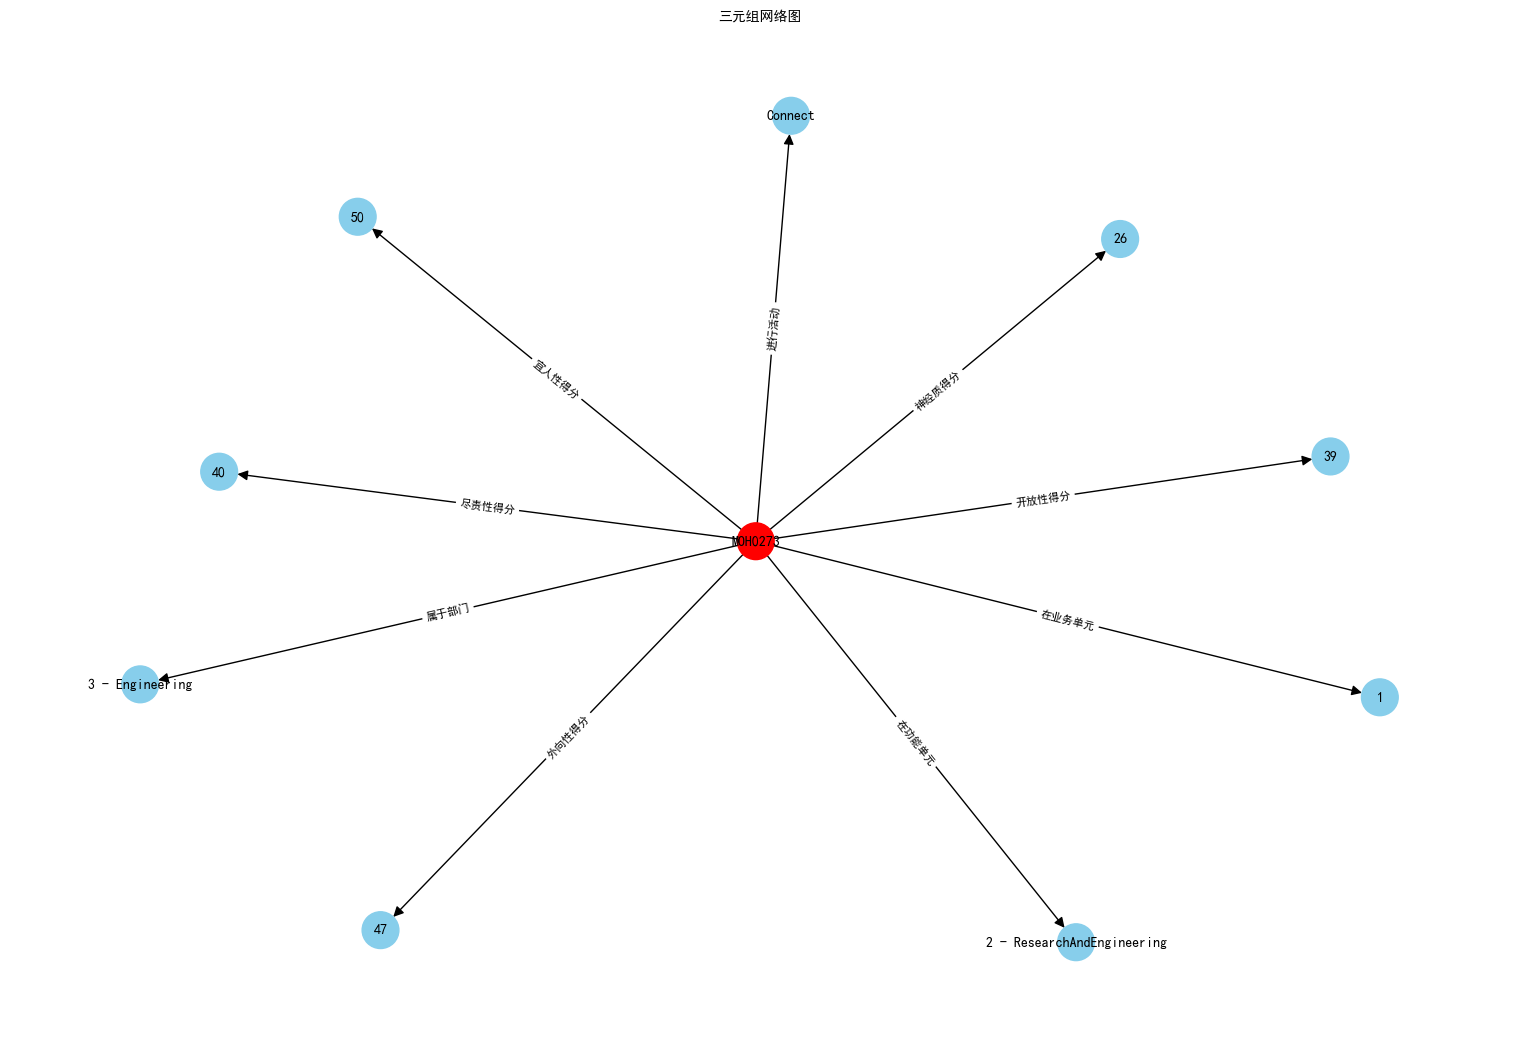

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 在 Jupyter Notebook 中显示 matplotlib 图形
%matplotlib inline

# Load the datasets from the provided paths
user_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\device.csv')
email_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\email.csv')
file_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\file.csv')
http_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\http.csv')
department_info_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\DepartmentInfo.csv')
psychometric_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\psychometric.csv')

# Function to check and clean data
def clean_data():
    # Check for missing values and drop or fill them
    user_activity_df.dropna(inplace=True)
    email_activity_df.dropna(inplace=True)
    file_activity_df.dropna(inplace=True)
    http_activity_df.dropna(inplace=True)
    department_info_df.dropna(inplace=True)
    psychometric_df.dropna(inplace=True)
    
    # Convert date columns to datetime format
    user_activity_df['date'] = pd.to_datetime(user_activity_df['date'])
    email_activity_df['date'] = pd.to_datetime(email_activity_df['date'])
    file_activity_df['date'] = pd.to_datetime(file_activity_df['date'])
    http_activity_df['date'] = pd.to_datetime(http_activity_df['date'])
    
    # Standardize the column names if necessary
    user_activity_df.columns = map(str.lower, user_activity_df.columns)
    email_activity_df.columns = map(str.lower, email_activity_df.columns)
    file_activity_df.columns = map(str.lower, file_activity_df.columns)
    http_activity_df.columns = map(str.lower, http_activity_df.columns)
    department_info_df.columns = map(str.lower, department_info_df.columns)
    psychometric_df.columns = map(str.lower, psychometric_df.columns)

    return (user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Clean the data
user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df = clean_data()

# Function to find inconsistent user_ids
def find_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    # Check the integrity of user_id across datasets
    user_ids = set(department_info_df['user_id'])
    
    inconsistent_user_ids = {
        'user_activity_df': [uid for uid in user_activity_df['user'] if uid not in user_ids],
        'email_activity_df': [uid for uid in email_activity_df['user'] if uid not in user_ids],
        'file_activity_df': [uid for uid in file_activity_df['user'] if uid not in user_ids],
        'http_activity_df': [uid for uid in http_activity_df['user'] if uid not in user_ids],
        'psychometric_df': [uid for uid in psychometric_df['user_id'] if uid not in user_ids],
    }
    
    return inconsistent_user_ids

# Find inconsistent user_ids
inconsistent_user_ids = find_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Display the inconsistent user_ids
inconsistent_user_ids_df = pd.DataFrame.from_dict(inconsistent_user_ids, orient='index').transpose()
print("Inconsistent User IDs:")
print(inconsistent_user_ids_df)

# Function to remove inconsistent user_ids
def remove_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    user_ids = set(department_info_df['user_id'])
    
    user_activity_df = user_activity_df[user_activity_df['user'].isin(user_ids)]
    email_activity_df = email_activity_df[email_activity_df['user'].isin(user_ids)]
    file_activity_df = file_activity_df[file_activity_df['user'].isin(user_ids)]
    http_activity_df = http_activity_df[http_activity_df['user'].isin(user_ids)]
    psychometric_df = psychometric_df[psychometric_df['user_id'].isin(user_ids)]
    
    return (user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Remove inconsistent user_ids
user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df = remove_inconsistent_user_ids(
    user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Define function to extract triples
def extract_triples(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    triples = []

    # From user_activity_df
    for _, row in user_activity_df.iterrows():
        triples.append((row['user'], '进行活动', row['activity']))
        triples.append((row['activity'], '发生在', row['date']))
        triples.append((row['user'], '使用设备', row['pc']))

    # From email_activity_df
    for _, row in email_activity_df.iterrows():
        triples.append((row['user'], '发送邮件到', row['to']))
        triples.append((row['user'], '使用设备', row['pc']))
        triples.append((row['id'], '邮件大小', row['size']))
        triples.append((row['id'], '附件数量', row['attachments']))
        triples.append((row['id'], '邮件内容', row['content']))

    # From file_activity_df
    for _, row in file_activity_df.iterrows():
        triples.append((row['user'], '访问文件', row['filename']))
        triples.append((row['filename'], '文件内容', row['content']))

    # From http_activity_df
    for _, row in http_activity_df.iterrows():
        triples.append((row['user'], '访问网址', row['url']))
        triples.append((row['url'], '网址内容', row['content']))

    # From department_info_df
    for _, row in department_info_df.iterrows():
        triples.append((row['user_id'], '属于部门', row['department']))
        triples.append((row['user_id'], '角色是', row['role']))
        triples.append((row['user_id'], '在业务单元', row['business_unit']))
        triples.append((row['user_id'], '在功能单元', row['functional_unit']))

    # From psychometric_df
    for _, row in psychometric_df.iterrows():
        triples.append((row['user_id'], '开放性得分', row['o']))
        triples.append((row['user_id'], '尽责性得分', row['c']))
        triples.append((row['user_id'], '外向性得分', row['e']))
        triples.append((row['user_id'], '宜人性得分', row['a']))
        triples.append((row['user_id'], '神经质得分', row['n']))

    return triples

# Extract triples
triples = extract_triples(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Set Chinese font
font_path = 'C:/Windows/Fonts/simhei.ttf'  # Windows系统下SimHei字体路径
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for triple in triples:
    G.add_edge(triple[0], triple[2], label=triple[1])

# Define specific users to highlight
highlight_users = {'MOH0273', 'AP0338', 'BP0552'}  # Add the user IDs you want to highlight

# Filter the graph to show specific activity types or roles
filtered_nodes = {n for n in G if G.degree(n) > 15 or n in highlight_users}  # Show nodes with degree > 15 or in highlight list
filtered_G = nx.DiGraph(G.subgraph(filtered_nodes))  # Create a mutable subgraph

# Remove nodes with no edges (isolated nodes)
isolated = list(nx.isolates(filtered_G))
filtered_G.remove_nodes_from(isolated)

# Draw the network graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(filtered_G, k=0.3)  # Adjust k for better spacing

# Draw nodes with different colors
node_color = ['red' if node in highlight_users else 'skyblue' for node in filtered_G.nodes()]
nx.draw(filtered_G, pos, with_labels=True, node_size=700, node_color=node_color, font_size=10, font_weight="bold", arrowsize=15,
        font_family=font_prop.get_name())

edge_labels = nx.get_edge_attributes(filtered_G, 'label')
nx.draw_networkx_edge_labels(filtered_G, pos, edge_labels=edge_labels, font_size=8, font_family=font_prop.get_name())

plt.title("三元组网络图", fontproperties=font_prop)
plt.show()


Inconsistent User IDs:
    user_activity_df email_activity_df file_activity_df http_activity_df  \
0            HSB0196              None          HSB0196          LRR0148   
1            HSB0196              None             None          NGF0157   
2               None              None             None          NGF0157   
3               None              None             None          LRR0148   
4               None              None             None          NGF0157   
..               ...               ...              ...              ...   
122             None              None             None             None   
123             None              None             None             None   
124             None              None             None             None   
125             None              None             None             None   
126             None              None             None             None   

    psychometric_df  
0           TCD0009  
1           YCE0983 

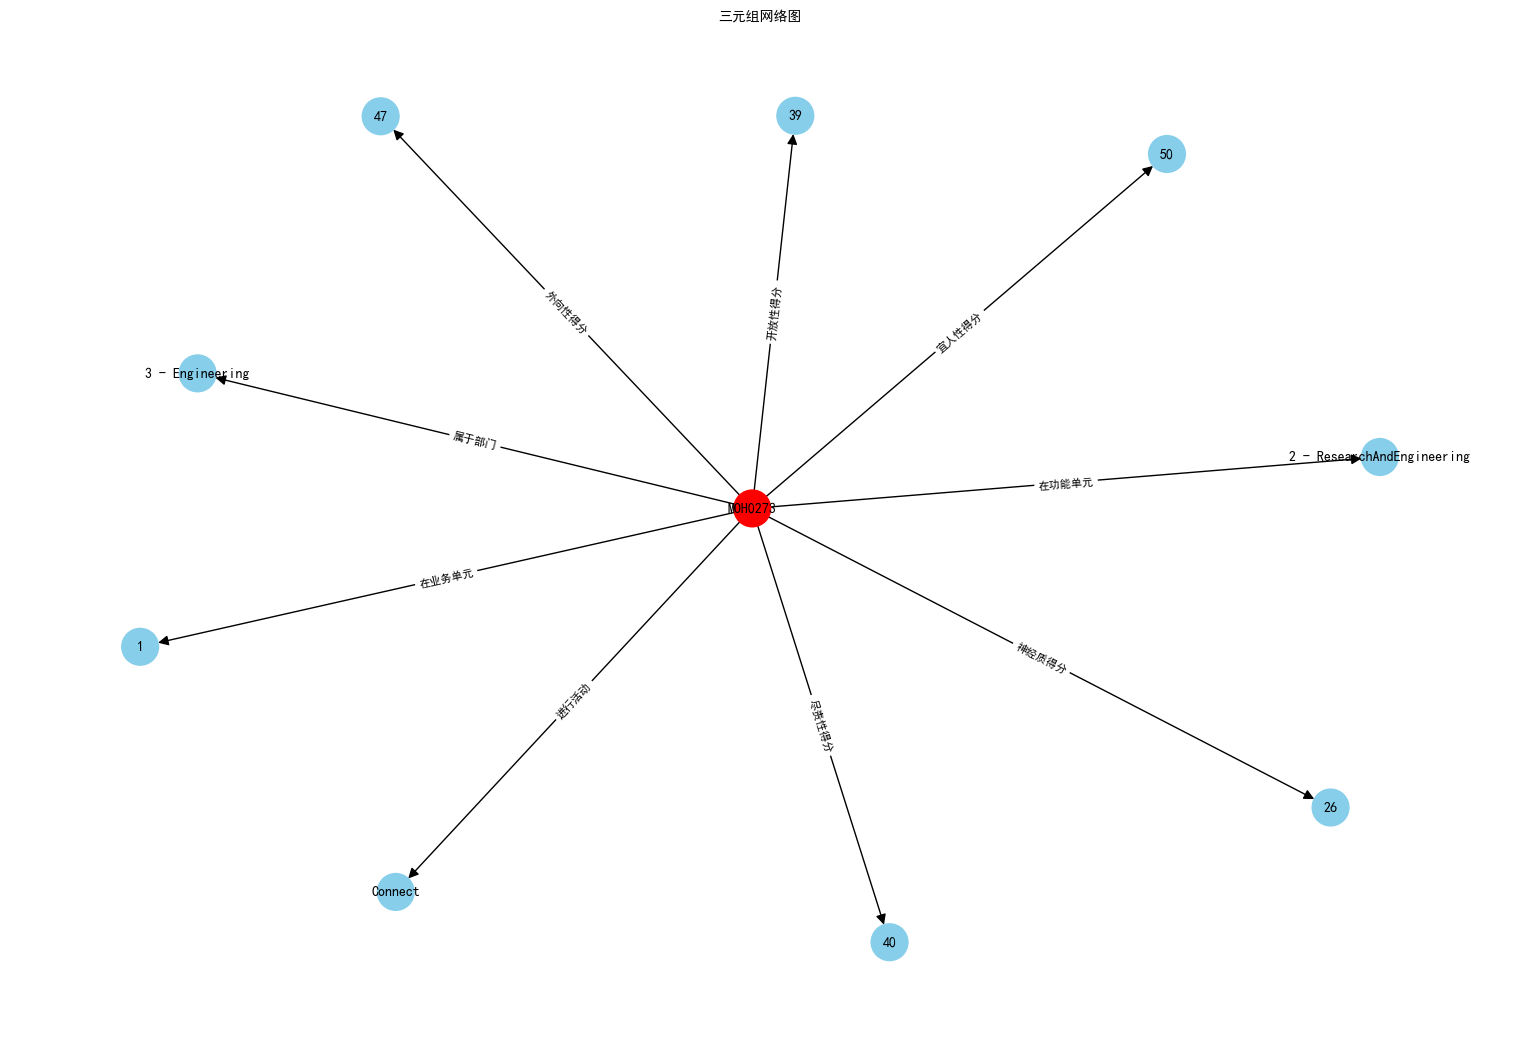

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 在 Jupyter Notebook 中显示 matplotlib 图形
%matplotlib inline

# Load the datasets from the provided paths
user_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\device.csv')
email_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\email.csv')
file_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\file.csv')
http_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\http.csv')
department_info_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\DepartmentInfo.csv')
psychometric_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\psychometric.csv')

# Function to check and clean data
def clean_data():
    # Check for missing values and drop or fill them
    user_activity_df.dropna(inplace=True)
    email_activity_df.dropna(inplace=True)
    file_activity_df.dropna(inplace=True)
    http_activity_df.dropna(inplace=True)
    department_info_df.dropna(inplace=True)
    psychometric_df.dropna(inplace=True)
    
    # Convert date columns to datetime format
    user_activity_df['date'] = pd.to_datetime(user_activity_df['date'])
    email_activity_df['date'] = pd.to_datetime(email_activity_df['date'])
    file_activity_df['date'] = pd.to_datetime(file_activity_df['date'])
    http_activity_df['date'] = pd.to_datetime(http_activity_df['date'])
    
    # Standardize the column names if necessary
    user_activity_df.columns = map(str.lower, user_activity_df.columns)
    email_activity_df.columns = map(str.lower, email_activity_df.columns)
    file_activity_df.columns = map(str.lower, file_activity_df.columns)
    http_activity_df.columns = map(str.lower, http_activity_df.columns)
    department_info_df.columns = map(str.lower, department_info_df.columns)
    psychometric_df.columns = map(str.lower, psychometric_df.columns)

    return (user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Clean the data
user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df = clean_data()

# Function to find inconsistent user_ids
def find_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    # Check the integrity of user_id across datasets
    user_ids = set(department_info_df['user_id'])
    
    inconsistent_user_ids = {
        'user_activity_df': [uid for uid in user_activity_df['user'] if uid not in user_ids],
        'email_activity_df': [uid for uid in email_activity_df['user'] if uid not in user_ids],
        'file_activity_df': [uid for uid in file_activity_df['user'] if uid not in user_ids],
        'http_activity_df': [uid for uid in http_activity_df['user'] if uid not in user_ids],
        'psychometric_df': [uid for uid in psychometric_df['user_id'] if uid not in user_ids],
    }
    
    return inconsistent_user_ids

# Find inconsistent user_ids
inconsistent_user_ids = find_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Display the inconsistent user_ids
inconsistent_user_ids_df = pd.DataFrame.from_dict(inconsistent_user_ids, orient='index').transpose()
print("Inconsistent User IDs:")
print(inconsistent_user_ids_df)

# Function to remove inconsistent user_ids
def remove_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    user_ids = set(department_info_df['user_id'])
    
    user_activity_df = user_activity_df[user_activity_df['user'].isin(user_ids)]
    email_activity_df = email_activity_df[email_activity_df['user'].isin(user_ids)]
    file_activity_df = file_activity_df[file_activity_df['user'].isin(user_ids)]
    http_activity_df = http_activity_df[http_activity_df['user'].isin(user_ids)]
    psychometric_df = psychometric_df[psychometric_df['user_id'].isin(user_ids)]
    
    return (user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Remove inconsistent user_ids
user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df = remove_inconsistent_user_ids(
    user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Define function to extract triples
def extract_triples(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    triples = []

    # From user_activity_df
    for _, row in user_activity_df.iterrows():
        triples.append((row['user'], '进行活动', row['activity']))
        triples.append((row['activity'], '发生在', row['date']))
        triples.append((row['user'], '使用设备', row['pc']))

    # From email_activity_df
    for _, row in email_activity_df.iterrows():
        triples.append((row['user'], '发送邮件到', row['to']))
        triples.append((row['user'], '使用设备', row['pc']))
        triples.append((row['id'], '邮件大小', row['size']))
        triples.append((row['id'], '附件数量', row['attachments']))
        triples.append((row['id'], '邮件内容', row['content']))

    # From file_activity_df
    for _, row in file_activity_df.iterrows():
        triples.append((row['user'], '访问文件', row['filename']))
        triples.append((row['filename'], '文件内容', row['content']))

    # From http_activity_df
    for _, row in http_activity_df.iterrows():
        triples.append((row['user'], '访问网址', row['url']))
        triples.append((row['url'], '网址内容', row['content']))

    # From department_info_df
    for _, row in department_info_df.iterrows():
        triples.append((row['user_id'], '属于部门', row['department']))
        triples.append((row['user_id'], '角色是', row['role']))
        triples.append((row['user_id'], '在业务单元', row['business_unit']))
        triples.append((row['user_id'], '在功能单元', row['functional_unit']))

    # From psychometric_df
    for _, row in psychometric_df.iterrows():
        triples.append((row['user_id'], '开放性得分', row['o']))
        triples.append((row['user_id'], '尽责性得分', row['c']))
        triples.append((row['user_id'], '外向性得分', row['e']))
        triples.append((row['user_id'], '宜人性得分', row['a']))
        triples.append((row['user_id'], '神经质得分', row['n']))

    return triples

# Extract triples
triples = extract_triples(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Set Chinese font
font_path = 'C:/Windows/Fonts/simhei.ttf'  # Windows系统下SimHei字体路径
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for triple in triples:
    G.add_edge(triple[0], triple[2], label=triple[1])

# Define specific users to highlight
highlight_users = {'MOH0273', 'AP0338', 'BP0552', 'JD1234', 'SM5678'}  # Add the user IDs you want to highlight

# Filter the graph to show specific activity types or roles
filtered_nodes = {n for n in G if G.degree(n) > 15 or n in highlight_users}  # Show nodes with degree > 15 or in highlight list
filtered_G = nx.DiGraph(G.subgraph(filtered_nodes))  # Create a mutable subgraph

# Remove nodes with no edges (isolated nodes)
isolated = list(nx.isolates(filtered_G))
filtered_G.remove_nodes_from(isolated)

# Draw the network graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(filtered_G, k=0.3)  # Adjust k for better spacing

# Draw nodes with different colors
node_color = ['red' if node in highlight_users else 'skyblue' for node in filtered_G.nodes()]
nx.draw(filtered_G, pos, with_labels=True, node_size=700, node_color=node_color, font_size=10, font_weight="bold", arrowsize=15,
        font_family=font_prop.get_name())

edge_labels = nx.get_edge_attributes(filtered_G, 'label')
nx.draw_networkx_edge_labels(filtered_G, pos, edge_labels=edge_labels, font_size=8, font_family=font_prop.get_name())

plt.title("三元组网络图", fontproperties=font_prop)
plt.show()


Inconsistent User IDs:
    user_activity_df email_activity_df file_activity_df http_activity_df  \
0            HSB0196              None          HSB0196          LRR0148   
1            HSB0196              None             None          NGF0157   
2               None              None             None          NGF0157   
3               None              None             None          LRR0148   
4               None              None             None          NGF0157   
..               ...               ...              ...              ...   
122             None              None             None             None   
123             None              None             None             None   
124             None              None             None             None   
125             None              None             None             None   
126             None              None             None             None   

    psychometric_df  
0           TCD0009  
1           YCE0983 

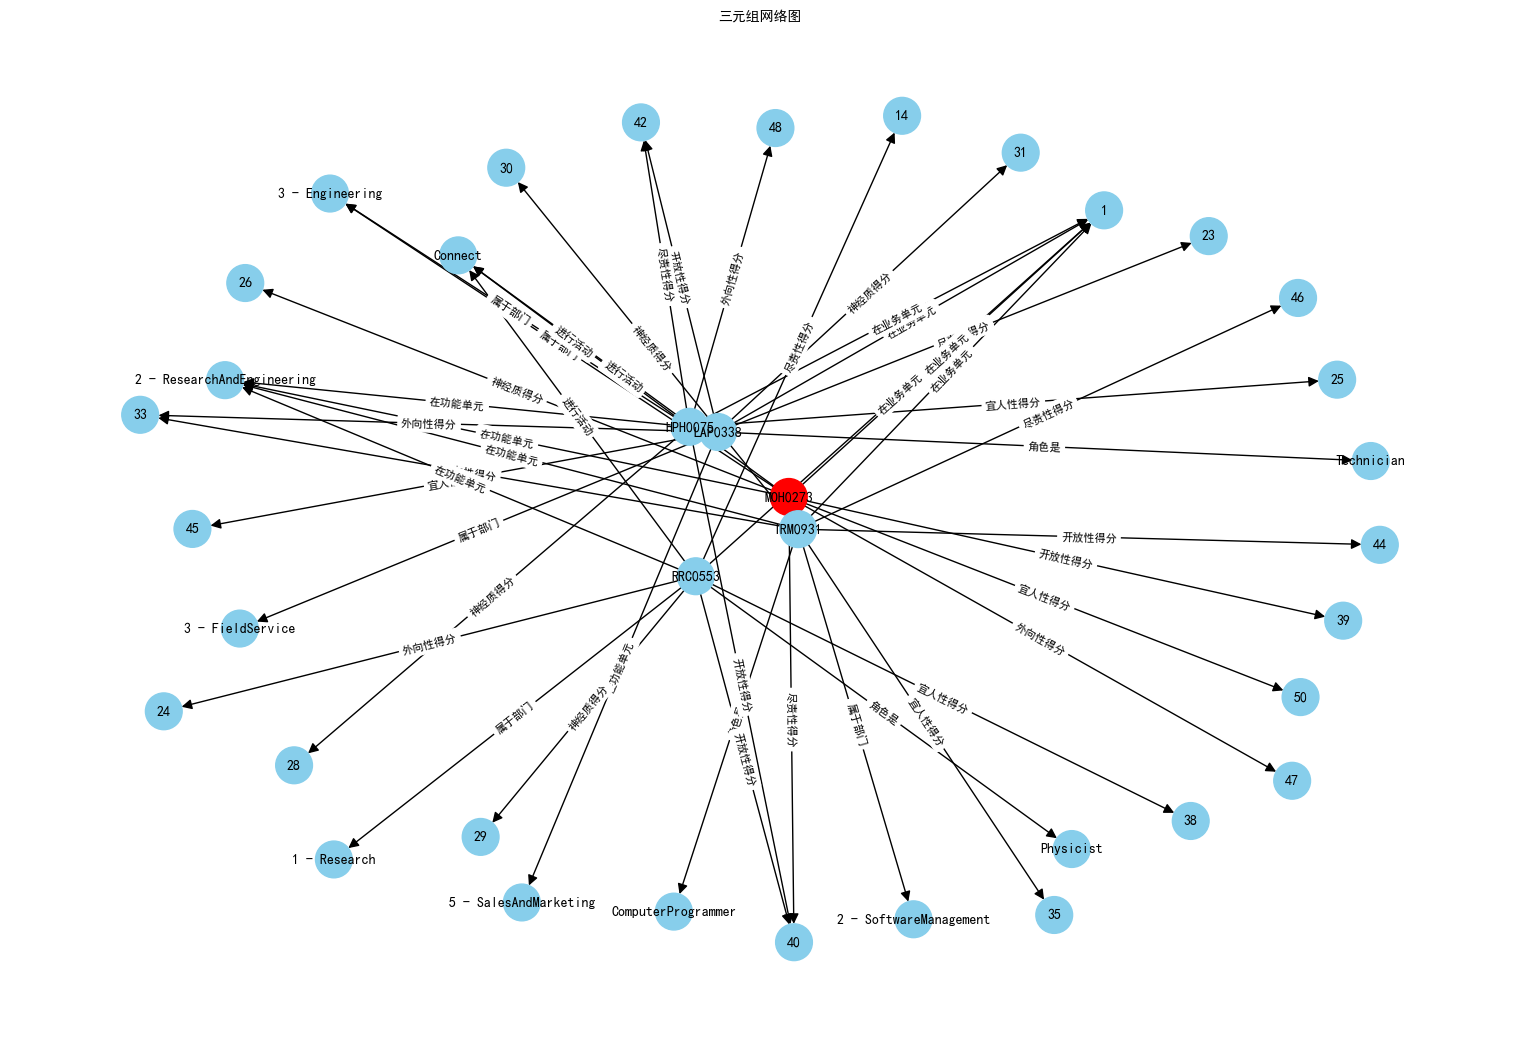

In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 在 Jupyter Notebook 中显示 matplotlib 图形
%matplotlib inline

# Load the datasets from the provided paths
user_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\device.csv')
email_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\email.csv')
file_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\file.csv')
http_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\http.csv')
department_info_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\DepartmentInfo.csv')
psychometric_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\psychometric.csv')

# Function to check and clean data
def clean_data():
    # Check for missing values and drop or fill them
    user_activity_df.dropna(inplace=True)
    email_activity_df.dropna(inplace=True)
    file_activity_df.dropna(inplace=True)
    http_activity_df.dropna(inplace=True)
    department_info_df.dropna(inplace=True)
    psychometric_df.dropna(inplace=True)
    
    # Convert date columns to datetime format
    user_activity_df['date'] = pd.to_datetime(user_activity_df['date'])
    email_activity_df['date'] = pd.to_datetime(email_activity_df['date'])
    file_activity_df['date'] = pd.to_datetime(file_activity_df['date'])
    http_activity_df['date'] = pd.to_datetime(http_activity_df['date'])
    
    # Standardize the column names if necessary
    user_activity_df.columns = map(str.lower, user_activity_df.columns)
    email_activity_df.columns = map(str.lower, email_activity_df.columns)
    file_activity_df.columns = map(str.lower, file_activity_df.columns)
    http_activity_df.columns = map(str.lower, http_activity_df.columns)
    department_info_df.columns = map(str.lower, department_info_df.columns)
    psychometric_df.columns = map(str.lower, psychometric_df.columns)

    return (user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Clean the data
user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df = clean_data()

# Function to find inconsistent user_ids
def find_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    # Check the integrity of user_id across datasets
    user_ids = set(department_info_df['user_id'])
    
    inconsistent_user_ids = {
        'user_activity_df': [uid for uid in user_activity_df['user'] if uid not in user_ids],
        'email_activity_df': [uid for uid in email_activity_df['user'] if uid not in user_ids],
        'file_activity_df': [uid for uid in file_activity_df['user'] if uid not in user_ids],
        'http_activity_df': [uid for uid in http_activity_df['user'] if uid not in user_ids],
        'psychometric_df': [uid for uid in psychometric_df['user_id'] if uid not in user_ids],
    }
    
    return inconsistent_user_ids

# Find inconsistent user_ids
inconsistent_user_ids = find_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Display the inconsistent user_ids
inconsistent_user_ids_df = pd.DataFrame.from_dict(inconsistent_user_ids, orient='index').transpose()
print("Inconsistent User IDs:")
print(inconsistent_user_ids_df)

# Function to remove inconsistent user_ids
def remove_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    user_ids = set(department_info_df['user_id'])
    
    user_activity_df = user_activity_df[user_activity_df['user'].isin(user_ids)]
    email_activity_df = email_activity_df[email_activity_df['user'].isin(user_ids)]
    file_activity_df = file_activity_df[file_activity_df['user'].isin(user_ids)]
    http_activity_df = http_activity_df[http_activity_df['user'].isin(user_ids)]
    psychometric_df = psychometric_df[psychometric_df['user_id'].isin(user_ids)]
    
    return (user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Remove inconsistent user_ids
user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df = remove_inconsistent_user_ids(
    user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Define function to extract triples
def extract_triples(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    triples = []

    # From user_activity_df
    for _, row in user_activity_df.iterrows():
        triples.append((row['user'], '进行活动', row['activity']))
        triples.append((row['activity'], '发生在', row['date']))
        triples.append((row['user'], '使用设备', row['pc']))

    # From email_activity_df
    for _, row in email_activity_df.iterrows():
        triples.append((row['user'], '发送邮件到', row['to']))
        triples.append((row['user'], '使用设备', row['pc']))
        triples.append((row['id'], '邮件大小', row['size']))
        triples.append((row['id'], '附件数量', row['attachments']))
        triples.append((row['id'], '邮件内容', row['content']))

    # From file_activity_df
    for _, row in file_activity_df.iterrows():
        triples.append((row['user'], '访问文件', row['filename']))
        triples.append((row['filename'], '文件内容', row['content']))

    # From http_activity_df
    for _, row in http_activity_df.iterrows():
        triples.append((row['user'], '访问网址', row['url']))
        triples.append((row['url'], '网址内容', row['content']))

    # From department_info_df
    for _, row in department_info_df.iterrows():
        triples.append((row['user_id'], '属于部门', row['department']))
        triples.append((row['user_id'], '角色是', row['role']))
        triples.append((row['user_id'], '在业务单元', row['business_unit']))
        triples.append((row['user_id'], '在功能单元', row['functional_unit']))

    # From psychometric_df
    for _, row in psychometric_df.iterrows():
        triples.append((row['user_id'], '开放性得分', row['o']))
        triples.append((row['user_id'], '尽责性得分', row['c']))
        triples.append((row['user_id'], '外向性得分', row['e']))
        triples.append((row['user_id'], '宜人性得分', row['a']))
        triples.append((row['user_id'], '神经质得分', row['n']))

    return triples

# Extract triples
triples = extract_triples(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Set Chinese font
font_path = 'C:/Windows/Fonts/simhei.ttf'  # Windows系统下SimHei字体路径
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for triple in triples:
    G.add_edge(triple[0], triple[2], label=triple[1])

# Define specific users to highlight
highlight_users = {'MOH0273', 'AP0338', 'BP0552', 'JD1234', 'SM5678'}  # Add the user IDs you want to highlight

# Filter the graph to show specific activity types or roles
filtered_nodes = {n for n in G if G.degree(n) > 13 or n in highlight_users}  # Show nodes with degree > 5 or in highlight list
filtered_G = nx.DiGraph(G.subgraph(filtered_nodes))  # Create a mutable subgraph

# Remove nodes with no edges (isolated nodes)
isolated = list(nx.isolates(filtered_G))
filtered_G.remove_nodes_from(isolated)

# Draw the network graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(filtered_G, k=0.3)  # Adjust k for better spacing

# Draw nodes with different colors
node_color = ['red' if node in highlight_users else 'skyblue' for node in filtered_G.nodes()]
nx.draw(filtered_G, pos, with_labels=True, node_size=700, node_color=node_color, font_size=10, font_weight="bold", arrowsize=15,
        font_family=font_prop.get_name())

edge_labels = nx.get_edge_attributes(filtered_G, 'label')
nx.draw_networkx_edge_labels(filtered_G, pos, edge_labels=edge_labels, font_size=8, font_family=font_prop.get_name())

plt.title("三元组网络图", fontproperties=font_prop)
plt.show()


In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from networkx.algorithms.community import greedy_modularity_communities

# 在 Jupyter Notebook 中显示 matplotlib 图形
%matplotlib inline

# Load the datasets from the provided paths
user_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\device.csv')
email_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\email.csv')
file_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\file.csv')
http_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\http.csv')
department_info_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\DepartmentInfo.csv')
psychometric_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\psychometric.csv')

# Function to check and clean data
def clean_data():
    # Check for missing values and drop or fill them
    user_activity_df.dropna(inplace=True)
    email_activity_df.dropna(inplace=True)
    file_activity_df.dropna(inplace=True)
    http_activity_df.dropna(inplace=True)
    department_info_df.dropna(inplace=True)
    psychometric_df.dropna(inplace=True)
    
    # Convert date columns to datetime format
    user_activity_df['date'] = pd.to_datetime(user_activity_df['date'])
    email_activity_df['date'] = pd.to_datetime(email_activity_df['date'])
    file_activity_df['date'] = pd.to_datetime(file_activity_df['date'])
    http_activity_df['date'] = pd.to_datetime(http_activity_df['date'])
    
    # Standardize the column names if necessary
    user_activity_df.columns = map(str.lower, user_activity_df.columns)
    email_activity_df.columns = map(str.lower, email_activity_df.columns)
    file_activity_df.columns = map(str.lower, file_activity_df.columns)
    http_activity_df.columns = map(str.lower, http_activity_df.columns)
    department_info_df.columns = map(str.lower, department_info_df.columns)
    psychometric_df.columns = map(str.lower, psychometric_df.columns)

    return (user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Clean the data
user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df = clean_data()

# Function to find inconsistent user_ids
def find_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    # Check the integrity of user_id across datasets
    user_ids = set(department_info_df['user_id'])
    
    inconsistent_user_ids = {
        'user_activity_df': [uid for uid in user_activity_df['user'] if uid not in user_ids],
        'email_activity_df': [uid for uid in email_activity_df['user'] if uid not in user_ids],
        'file_activity_df': [uid for uid in file_activity_df['user'] if uid not in user_ids],
        'http_activity_df': [uid for uid in http_activity_df['user'] if uid not in user_ids],
        'psychometric_df': [uid for uid in psychometric_df['user_id'] if uid not in user_ids],
    }
    
    return inconsistent_user_ids

# Find inconsistent user_ids
inconsistent_user_ids = find_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Display the inconsistent user_ids
inconsistent_user_ids_df = pd.DataFrame.from_dict(inconsistent_user_ids, orient='index').transpose()
print("Inconsistent User IDs:")
print(inconsistent_user_ids_df)

# Function to remove inconsistent user_ids
def remove_inconsistent_user_ids(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    user_ids = set(department_info_df['user_id'])
    
    user_activity_df = user_activity_df[user_activity_df['user'].isin(user_ids)]
    email_activity_df = email_activity_df[email_activity_df['user'].isin(user_ids)]
    file_activity_df = file_activity_df[file_activity_df['user'].isin(user_ids)]
    http_activity_df = http_activity_df[http_activity_df['user'].isin(user_ids)]
    psychometric_df = psychometric_df[psychometric_df['user_id'].isin(user_ids)]
    
    return (user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Remove inconsistent user_ids
user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df = remove_inconsistent_user_ids(
    user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Define function to extract triples
def extract_triples(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df):
    triples = []

    # From user_activity_df
    for _, row in user_activity_df.iterrows():
        triples.append((row['user'], '进行活动', row['activity']))
        triples.append((row['activity'], '发生在', row['date']))
        triples.append((row['user'], '使用设备', row['pc']))

    # From email_activity_df
    for _, row in email_activity_df.iterrows():
        triples.append((row['user'], '发送邮件到', row['to']))
        triples.append((row['user'], '使用设备', row['pc']))
        triples.append((row['id'], '邮件大小', row['size']))
        triples.append((row['id'], '附件数量', row['attachments']))
        triples.append((row['id'], '邮件内容', row['content']))

    # From file_activity_df
    for _, row in file_activity_df.iterrows():
        triples.append((row['user'], '访问文件', row['filename']))
        triples.append((row['filename'], '文件内容', row['content']))

    # From http_activity_df
    for _, row in http_activity_df.iterrows():
        triples.append((row['user'], '访问网址', row['url']))
        triples.append((row['url'], '网址内容', row['content']))

    # From department_info_df
    for _, row in department_info_df.iterrows():
        triples.append((row['user_id'], '属于部门', row['department']))
        triples.append((row['user_id'], '角色是', row['role']))
        triples.append((row['user_id'], '在业务单元', row['business_unit']))
        triples.append((row['user_id'], '在功能单元', row['functional_unit']))

    # From psychometric_df
    for _, row in psychometric_df.iterrows():
        triples.append((row['user_id'], '开放性得分', row['o']))
        triples.append((row['user_id'], '尽责性得分', row['c']))
        triples.append((row['user_id'], '外向性得分', row['e']))
        triples.append((row['user_id'], '宜人性得分', row['a']))
        triples.append((row['user_id'], '神经质得分', row['n']))

    return triples

# Extract triples
triples = extract_triples(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Set Chinese font
font_path = 'C:/Windows/Fonts/simhei.ttf'  # Windows系统下SimHei字体路径
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for triple in triples:
    G.add_edge(triple[0], triple[2], label=triple[1])

# Define specific users to highlight
highlight_users = {'MOH0273', 'AP0338', 'BP0552', 'JD1234', 'SM5678'}  # Add the user IDs you want to highlight

# Filter the graph to show specific activity types or roles
filtered_nodes = {n for n in G if G.degree(n) > 5 or n in highlight_users}  # Show nodes with degree > 5 or in highlight list
filtered_G = nx.DiGraph(G.subgraph(filtered_nodes))  # Create a mutable subgraph

# Remove nodes with no edges (isolated nodes)
isolated = list(nx.isolates(filtered_G))
filtered_G.remove_nodes_from(isolated)

# Ensure all edge weights are numeric (if they exist)
for u, v, d in filtered_G.edges(data=True):
    if 'weight' in d:
        try:
            d['weight'] = float(d['weight'])
        except ValueError:
            d['weight'] = 1.0  # or some default value

# Community detection
communities = list(greedy_modularity_communities(filtered_G))

# Assign a community number to each node
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

# Draw the graph with community coloring
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(filtered_G, k=0.3)

node_color = [community_map[node] for node in filtered_G.nodes()]
nx.draw(filtered_G, pos, with_labels=True, node_size=700, node_color=node_color, cmap=plt.cm.rainbow, font_size=10, font_weight="bold", arrowsize=15, font_family=font_prop.get_name())

edge_labels = nx.get_edge_attributes(filtered_G, 'label')
nx.draw_networkx_edge_labels(filtered_G, pos, edge_labels=edge_labels, font_size=8, font_family=font_prop.get_name())

plt.title("三元组网络图 - 社区检测", fontproperties=font_prop)
plt.show()



Inconsistent User IDs:
    user_activity_df email_activity_df file_activity_df http_activity_df  \
0            HSB0196              None          HSB0196          LRR0148   
1            HSB0196              None             None          NGF0157   
2               None              None             None          NGF0157   
3               None              None             None          LRR0148   
4               None              None             None          NGF0157   
..               ...               ...              ...              ...   
122             None              None             None             None   
123             None              None             None             None   
124             None              None             None             None   
125             None              None             None             None   
126             None              None             None             None   

    psychometric_df  
0           TCD0009  
1           YCE0983 

TypeError: Consider using a tuple, with a priority value that can be compared.

In [23]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from networkx.algorithms.community import greedy_modularity_communities

# Load the datasets from the provided paths
user_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\device.csv')
email_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\email.csv')
file_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\file.csv')
http_activity_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\http.csv')
department_info_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\DepartmentInfo.csv')
psychometric_df = pd.read_csv(r'D:\dataset\cmu-cert r4.2\demo\psychometric.csv')

# Function to check and clean data
def clean_data():
    # Replace 'None' string with NaN and drop NaN values
    for df in [user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df]:
        df.replace('None', pd.NA, inplace=True)
        df.dropna(inplace=True)
        if 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date'])
        df.columns = map(str.lower, df.columns)

    return (user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df)

# Clean the data
(user_activity_df, email_activity_df, file_activity_df, http_activity_df, department_info_df, psychometric_df) = clean_data()

# Function to find inconsistent user_ids
def find_inconsistent_user_ids():
    # Check the integrity of user_id across datasets
    user_ids = set(department_info_df['user_id'])
    inconsistent_user_ids = {}
    for df_name, df in zip(['user_activity_df', 'email_activity_df', 'file_activity_df', 'http_activity_df', 'psychometric_df'],
                           [user_activity_df, email_activity_df, file_activity_df, http_activity_df, psychometric_df]):
        df_key = 'user_id' if 'user_id' in df.columns else 'user'
        inconsistent_user_ids[df_name] = df[~df[df_key].isin(user_ids)][df_key].unique().tolist()

    return inconsistent_user_ids

# Find inconsistent user_ids
inconsistent_user_ids = find_inconsistent_user_ids()

# Function to extract triples
def extract_triples():
    triples = []
    # Helper function to add triple if valid
    def add_triple(source, relation, target):
        if pd.notna(source) and pd.notna(target):
            triples.append((source, relation, target))

    # Add triples from user_activity_df
    if 'user' in user_activity_df.columns:
        for _, row in user_activity_df.iterrows():
            add_triple(row['user'], '进行活动', row.get('activity', 'Unknown'))
            add_triple(row['user'], '使用设备', row.get('pc', 'Unknown'))
            if 'date' in row:
                add_triple(row.get('activity', 'Unknown'), '发生在', row['date'])

    # Add triples from email_activity_df
    if 'user' in email_activity_df.columns:
        for _, row in email_activity_df.iterrows():
            add_triple(row['user'], '发送邮件到', row.get('to', 'Unknown'))
            add_triple(row['user'], '使用设备', row.get('pc', 'Unknown'))
            add_triple(row.get('id', 'Unknown'), '邮件大小', row.get('size', 'Unknown'))
            add_triple(row.get('id', 'Unknown'), '附件数量', row.get('attachments', 'Unknown'))
            add_triple(row.get('id', 'Unknown'), '邮件内容', row.get('content', 'Unknown'))

    # Add triples from file_activity_df
    if 'user' in file_activity_df.columns:
        for _, row in file_activity_df.iterrows():
            add_triple(row['user'], '访问文件', row.get('filename', 'Unknown'))
            add_triple(row.get('filename', 'Unknown'), '文件内容', row.get('content', 'Unknown'))

    # Add triples from http_activity_df
    if 'user' in http_activity_df.columns:
        for _, row in http_activity_df.iterrows():
            add_triple(row['user'], '访问网址', row.get('url', 'Unknown'))
            add_triple(row.get('url', 'Unknown'), '网址内容', row.get('content', 'Unknown'))

    # Add triples from department_info_df
    if 'user_id' in department_info_df.columns:
        for _, row in department_info_df.iterrows():
            add_triple(row['user_id'], '属于部门', row.get('department', 'Unknown'))
            add_triple(row['user_id'], '角色是', row.get('role', 'Unknown'))
            add_triple(row['user_id'], '在业务单元', row.get('business_unit', 'Unknown'))
            add_triple(row['user_id'], '在功能单元', row.get('functional_unit', 'Unknown'))

    # Add triples from psychometric_df
    if 'user_id' in psychometric_df.columns:
        for _, row in psychometric_df.iterrows():
            add_triple(row['user_id'], '开放性得分', row.get('o', 'Unknown'))
            add_triple(row['user_id'], '尽责性得分', row.get('c', 'Unknown'))
            add_triple(row['user_id'], '外向性得分', row.get('e', 'Unknown'))
            add_triple(row['user_id'], '宜人性得分', row.get('a', 'Unknown'))
            add_triple(row['user_id'], '神经质得分', row.get('n', 'Unknown'))

    return triples

# Extract triples
triples = extract_triples()

# Set Chinese font
font_path = 'C:/Windows/Fonts/simhei.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# Create a directed graph
G = nx.DiGraph()
# Add nodes and edges with weights (if applicable)
for triple in triples:
    G.add_edge(triple[0], triple[2], label=triple[1], weight=1.0)  # Ensuring weight is float

# Ensure all edge weights are numeric
for u, v, d in G.edges(data=True):
    try:
        d['weight'] = float(d.get('weight', 1.0))
    except ValueError:
        d['weight'] = 1.0  # Default weight

# Filter graph for drawing
filtered_nodes = {n for n in G if G.degree(n) > 5}
frozen_subgraph = nx.subgraph(G, filtered_nodes)

# Create a mutable copy of the filtered graph
filtered_G = nx.DiGraph(frozen_subgraph)
isolated = list(nx.isolates(filtered_G))
filtered_G.remove_nodes_from(isolated)

# Community detection
communities = list(greedy_modularity_communities(filtered_G, weight='weight'))

# Assign a community number to each node
community_map = {node: i for i, community in enumerate(communities) for node in community}

# Draw the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(filtered_G, k=0.3)
node_color = [community_map[node] for node in filtered_G.nodes()]
nx.draw(filtered_G, pos, with_labels=True, node_size=700, node_color=node_color, cmap=plt.cm.rainbow,
        font_size=10, font_weight="bold", arrowsize=15, font_family=font_prop.get_name())
edge_labels = nx.get_edge_attributes(filtered_G, 'label')
nx.draw_networkx_edge_labels(filtered_G, pos, edge_labels=edge_labels, font_size=8, font_family=font_prop.get_name())
plt.title("三元组网络图 - 社区检测", fontproperties=font_prop)
plt.show()


TypeError: Consider using a tuple, with a priority value that can be compared.